<a href="https://colab.research.google.com/github/MohamadRayi/MachineLearningTasks/blob/main/Mohamad_Rayi_Dwi_Putra_1103213070_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mohamad Rayi Dwi Putra

1103213070

Dataset : Train and Test.csv

UJIAN TENGAH SEMESTER-CREDIT CARD FRAUD PREDICTION​

Model : XGBoost and MSE

Preview Data Train:
       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Uti

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MSE: 0.11737034155902679


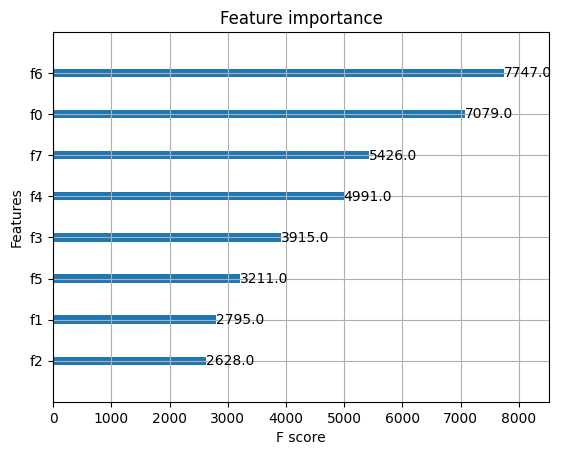

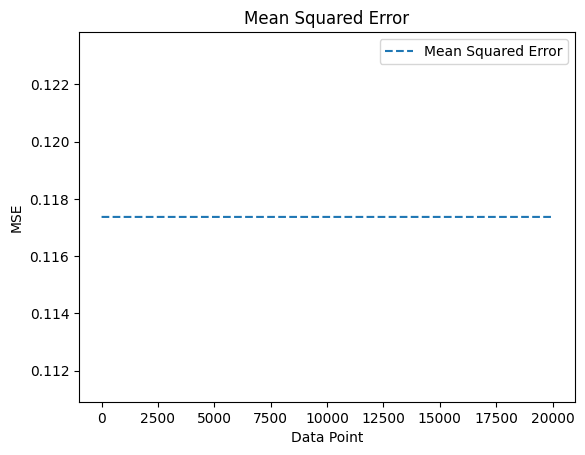

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Membaca dataset train dan test
train_data = pd.read_csv("/content/drive/MyDrive/Dataset/train.csv", low_memory=False)
test_data = pd.read_csv("/content/drive/MyDrive/Dataset/test.csv", low_memory=False)

# Menampilkan preview data train dan test
print("Preview Data Train:")
print(train_data.head())
print("\nPreview Data Test:")
print(test_data.head())

# Memilih kolom-kolom dengan tipe data non-numerik pada train dataset
non_numeric_cols_train = train_data.select_dtypes(exclude=['number']).columns

# Membuat imputer dengan strategi mode untuk kolom-kolom non-numerik pada train dataset
imputer_mode_train = SimpleImputer(strategy="most_frequent")
for col in non_numeric_cols_train:
    train_data[col] = imputer_mode_train.fit_transform(train_data[[col]]).flatten()  # Mengubah hasil imputasi ke dalam format yang sesuai

# Memilih kolom-kolom dengan tipe data non-numerik pada test dataset
non_numeric_cols_test = test_data.select_dtypes(exclude=['number']).columns

# Membuat imputer dengan strategi mode untuk kolom-kolom non-numerik pada test dataset
imputer_mode_test = SimpleImputer(strategy="most_frequent")
for col in non_numeric_cols_test:
    test_data[col] = imputer_mode_test.fit_transform(test_data[[col]]).flatten()  # Mengubah hasil imputasi ke dalam format yang sesuai

# Pra-pemrosesan data untuk train dataset
train_numeric_data = train_data.select_dtypes(include=['number'])  # Memilih kolom-kolom numerik pada train dataset
train_imputer = SimpleImputer(strategy="median")
train_numeric_data_imputed = pd.DataFrame(train_imputer.fit_transform(train_numeric_data), columns=train_numeric_data.columns)

# Menambahkan kolom 'Payment_Behaviour' ke dalam train dataset yang telah diimputasi
train_numeric_data_imputed['Payment_Behaviour'] = train_data['Payment_Behaviour']

# Menampilkan preview data sebelum dan sesudah di proses
print("\nData Train Sebelum Diproses:")
print(train_data.head())
print("\nData Train Sesudah Diproses:")
print(train_numeric_data_imputed.head())

# Memisahkan fitur dan target untuk train dataset
X_train = train_numeric_data_imputed.drop(columns=["Payment_Behaviour"])
y_train = train_numeric_data_imputed["Payment_Behaviour"]

# Membaca kolom target yang berisi nilai kategorikal pada train dataset
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Membuat objek OneHotEncoder untuk kolom target
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Mengonversi nilai kategori menjadi representasi one-hot
y_train_encoded_onehot = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))

# Pra-pemrosesan data untuk test dataset
test_numeric_data = test_data.select_dtypes(include=['number'])  # Memilih kolom-kolom numerik pada test dataset
test_imputer = SimpleImputer(strategy="median")
test_numeric_data_imputed = pd.DataFrame(test_imputer.fit_transform(test_numeric_data), columns=test_numeric_data.columns)

# Menyimpan kolom 'ID' dari test dataset untuk penggunaan di akhir
test_ids = test_data["ID"]

# Penskalaan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_numeric_data_imputed)  # Skalasi menggunakan nilai yang sama dengan train dataset

# Membuat model XGBoost
model = XGBRegressor()

# Melatih model
model.fit(X_train_scaled, y_train_encoded_onehot)

# Melakukan prediksi pada data uji
y_pred_encoded_onehot = model.predict(X_test_scaled)

# Mengonversi hasil prediksi kembali ke bentuk aslinya
y_pred_encoded_labels = np.argmax(y_pred_encoded_onehot, axis=1)
y_pred = label_encoder.inverse_transform(y_pred_encoded_labels)

# Menyimpan hasil prediksi ke dalam DataFrame
predictions = pd.DataFrame({"ID": test_ids, "Payment_Behaviour": y_pred})

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train_encoded_onehot, test_size=0.2, random_state=42)

# Membuat dan melatih model XGBoost
model = XGBRegressor()
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred_encoded_onehot = model.predict(X_test)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred_encoded_onehot)
print("MSE:", mse)

# Visualisasi feature importance
plot_importance(model)
plt.show()

# Visualisasi MSE
plt.plot(range(len(y_test)), [mse]*len(y_test), linestyle='--', label='Mean Squared Error')
plt.title('Mean Squared Error')
plt.xlabel('Data Point')
plt.ylabel('MSE')
plt.legend()
plt.show()
